<a href="https://colab.research.google.com/github/whaner/EAD5844/blob/master/Exercicios/Ex_Aula_3_Whaner_Endo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

## **Exercício 58**
De acordo com a Annual Consumer Spending Survey de 2003, a cobrança mensal média no cartão de crédito Visa do BofA foi de $ 1,838 (US Airways Attaché Magazine, dezembro de 2003). Uma amosta dos gastos mensais de carõess de crédito apresenta os seguintes dados:

In [2]:
dados =  pd.Series([236,1710,1351,825,7450,316,4135,1333,1584,387,991,3396,170,1428,1688]) #dados
print(dados)

0      236
1     1710
2     1351
3      825
4     7450
5      316
6     4135
7     1333
8     1584
9      387
10     991
11    3396
12     170
13    1428
14    1688
dtype: int64


In [3]:
dados = dados.sort_values(ascending=True)
print(dados)

12     170
0      236
5      316
9      387
3      825
10     991
7     1333
2     1351
13    1428
8     1584
14    1688
1     1710
11    3396
6     4135
4     7450
dtype: int64


**a. Calcule a média e a mediana.**

In [4]:
print('Média = ', dados.mean())
print('Mediana =', dados.median())

Média =  1800.0
Mediana = 1351.0


**b. Calcule  primeiro e o terceiro quartis.**

In [5]:
#print('primeiro quartil =', dados.quantile(q=0.25))
#print('primeiro quartil =', dados.quantile(q=0.25, interpolation='linear'))
print('primeiro quartil =', dados.quantile(q=0.25, interpolation='lower'))
#print('primeiro quartil =', dados.quantile(q=0.25, interpolation='higher'))
#print('primeiro quartil =', dados.quantile(q=0.25, interpolation='midpoint'))
#print('primeiro quartil =', dados.quantile(q=0.25, interpolation='nearest'))
print('terceiro quartil =', dados.quantile(q=0.75, interpolation='higher'))

primeiro quartil = 387
terceiro quartil = 1710


**c. Calcule a amplitude e a amplitude interquartil.**

In [6]:
print('Amplitude =', dados.max() - dados.min())
print('Amplitude interquartil =', dados.quantile(q=0.75, interpolation='higher') - dados.quantile(q=0.25, interpolation='lower'))
print('1,5 x (Amplitude interquartil) =', 1.5*(dados.quantile(q=0.75, interpolation='higher') - dados.quantile(q=0.25, interpolation='lower')))

Amplitude = 7280
Amplitude interquartil = 1323
1,5 x (Amplitude interquartil) = 1984.5


**d. Calcule a variância e o desvio padrão.**

In [7]:
print('Variância =', dados.var())
print('Desvio Padrão =', dados.std())

Variância = 3675303.0
Desvio Padrão = 1917.107978179633


**e. A medida de assimetria desses dados é 2,12. Comente a forma dessa distribuição. Ela tem a forma esperada? Por que sim ou pro que não?**

In [8]:
print('Assimetria (Skewness) =', dados.skew())

Assimetria (Skewness) = 2.1195274576903658


Como a assimetria é positiva (skewness), então a curva de distribuição é assimétrica à direita, portanto, mais dados com menos gasto. Sim, era esperado já que normalmente, seria esperado gastos menores para uma maior parte da população, já que estamos falando da população em geral e não um segmento mais rico.

**f. Os dados contém outliers?**

{'boxes': [<matplotlib.lines.Line2D at 0x7f708fc45748>],
 'caps': [<matplotlib.lines.Line2D at 0x7f708fc5a198>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f708fc5ac18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f708fc5a898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f708fc45a58>,
  <matplotlib.lines.Line2D at 0x7f708fc45dd8>]}

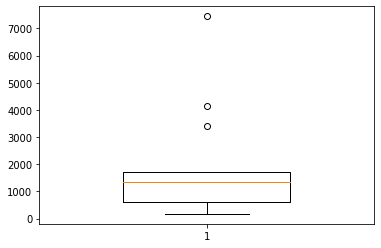

In [11]:
plt.boxplot(dados, widths=0.5)

Ao plotarmos o boxplot, percebe-se que sim, existem três outliers: 7450, 4135 e 3396. Esse resultado foi identico ao obtido no SPSS.

**MAS**

*   Na resposta do livro está dando apenas dois outliers...
*   Na apresentação da aula, foram calculadas as fronteiras máximas e mínimas, com a fórmula Q1-1,5x(Q3-Q1) e Q3-1,5x(Q3-Q1) e os valores que estavam além destas fronteiras foram considerados outliers. Sendo assim:




In [0]:
fmin = dados.quantile(q=0.25, interpolation='lower') - 1.5*(dados.quantile(q=0.75, interpolation='higher') - dados.quantile(q=0.25, interpolation='lower'))
fmax = fm = dados.quantile(q=0.75, interpolation='higher') + 1.5*(dados.quantile(q=0.75, interpolation='higher') - dados.quantile(q=0.25, interpolation='lower'))
print('fmim =', fmin)
print('fmax =', fmax)

Não existe nenhum outlier abaixo da fronteira mínima e dois acima da fronteira máxima: 7450 e 4135.

## **Exercício 59**

O U.S. Census Bureau (Departamento de Recenseamento dos EUA) fornece estatísticas sobre a vida das famílias nos EUA, incluindo a idade para o primeiro casamento, estado civil e o tamanho da família (US Census Bureaua, 20 de março de 2006). Os dados a seguir mostram a idade para o primeiro casamento para uma amostra de homens e uma amostra de mulheres:

In [0]:
homem = pd.Series([26,23,28,25,27,30,26,35,28,21,24,27,29,30,27,32,27,25])
mulher = pd.Series([20,28,23,30,24,29,26,25,22,22,25,23,27,26,19])

**a. Calcule a mediana das idades do primeiro casamento para homens e mulheres**

In [0]:
print('Mediana homens =', homem.median())
print('Mediana mulheres =', mulher.median())

**b. Calcule o primeiro e o terceiro quartis para homens e mulheres.**

In [0]:
print('primeiro quartil homens =', homem.quantile(q=0.25, interpolation='lower'))
print('terceiro quartil homens =', homem.quantile(q=0.75, interpolation='higher')) #poderia usar np.percentile(homem,75)
print('primeiro quartil mulheres =', mulher.quantile(q=0.25, interpolation='lower'))
print('terceiro quartil mulheres =', mulher.quantile(q=0.75, interpolation='higher'))

**c. Há 25 anos, a idade mediana do primeiro casamento era de 25 anos para homens e de 22 anos para as mulheres. Que percepção essa informação oferece sobre a decisão de quando se casar, entre os jovens da atualidade?**

Como a mediana se deslocou para uma idade mais alta, significa que os jovens estão casando mais velhos.

## **Exercício 60**

O Ministério da educação dos Estados Unidos relata que cerca de 50% de todos os universitários utilizam o crédito educativo para ajudar a custear as despesas com a faculdade (National Center for Educational Studies, janeiro de 2006). Uma amostra de estudantes formados com ajuda de crédito educativo é apresentada a seguir. Os dados, em milhares de dólares, mostram quantidades típicas de débitos após a formatura.

In [0]:
debito = pd.Series([10.1, 14.8, 5.0, 10.2, 12.4, 12.2, 2.0, 11.5, 17.8, 4.0])
debito

**a. Para aqueles estudantes que utilizaram o crédito aducativo, qual é a média de débito após a formatura?**

In [0]:
media = debito.mean()
print('A média para os estudantes que usaram o crédito educativo é de: US$', round(media,3), 'mil')

**b. Qual a variância? E o desvio padrão?**

In [0]:
variancia = debito.var()
dp = debito.std()
print('A variância é:', round(variancia,2))
print('O desvio padrão é:', round(dp,2))

## **Exercício 61**

O retorno em dividendos são os dividendos anuais de uma empresa paga, divididos pelo preço de mercado atual por ação, expressos na forma de porcentagem. Uma amostra de 10 grandes empresas produziu seguintes dados sobre o retorno dividendos (The Wall Stereet Journal, 16 de janeiro de 2004).

In [0]:
df = pd.DataFrame({'Empresa': pd.Categorical(["Atria Group", "American Express", "Caterpillar", "Eastman Kodak",
                                              "ExxonMobil", "General Motors", "JPMorgan", "McDonald's", "United Technology", "Wallmart Stores"]),
                   'Retorno': pd.Series([5.0, 0.8, 1.8, 1.9, 2.5, 3.7, 3.5, 1.6, 1.5, 0.7])})

**a. Qual a média e a mediana dos retornos em dividendos?**

In [0]:
media = df.mean()
mediana = df.median()

In [0]:
print (media)
print (mediana)

*Resposta: A média é 2,3 e a mediana 1,85.*

**b. Qual é a variância e o desvio padrão?**

In [0]:
variancia = df.var()
desvio = df.std()

In [0]:
print(round(variancia, 3))
print(round(desvio,3))

*Resposta: A variância é 1,898 e o desvio padrão é 1,378.*

**c. Qual empresa proporciona o maior retorno em dividendos?**

In [0]:
ordenado = df['Retorno'].sort_values(ascending=True)

In [0]:
print(ordenado)

In [0]:
df

*Resposta: Ordenando a base em ordem crescente do Retorno, percebesse que a empresa que tem o maior retorno (5.0) é de index '0', ou seja, a Atria Group.*

**d. Qual é o escore-z do McDonald's? Interprete esse escore-z.**

In [0]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].apply(zc)

*Resposta: Como o escore-z do McDonald's é -0,54, isso significa que ele está meio desvio padrão abaixo da média do retorno dentre as empresas listadas.*

**e. Qual é o escore-z da General Motors? Interprete esse escore-z.**

*Resposta: Como o escore-z da General Motors é 1,07, isso significa que ele está, praticamente, um desvio padrão acima da média do retorno dentre as empresas listadas.*

**f. Com base nos escores-z, os dados possuem algum outlier?**

*Resposta: Como o padrão é que, considerando o escore-z, caso haja algum valor além do intervalo de 3 desvios padrão, ou seja, z-score maior que 3 ou menor que -3, este é considerado um outlier e, no caso dos dados, nenhum é > 3 ou < -3, então, não existe outlier na amostra.*

## **Exercício 62**


**Em geral, os proprietários de pequenas empresas recorrem a companhia especializadas em folhas de pagamento para cuidar da folha de pagamento de seus empregados. Isso ocorre porque os priprietários de empresas de pequeno porte se deparam com complicadas regulamentações de impostos e porque as multas referentes a erros nos impostos empregatícios são grandes. De acordo com o Internal Revenue Service, 26% de todas as declarações de imporstos de pequenas empresas continham erros que resultaram em multas para os proprietários (The WSJ, 30 de janeiro de 2006). A multa sobre os impostos para uma amostra de 20 empresas é apresentada a seguir:**

In [0]:
empresas = pd.DataFrame([820,270,450,1010,890,700,1350,350,300,1200,390,730,2040,230,640,350,420,270,370,620])

**a. Qual é o valor médio das multas sobre impostos para declarações de impostos preenchidas incorretamente?**

In [0]:
print(empresas.mean())

*Resposta: A média das multas é de US$670.00*

**b. Qual é o desvio padrão?**

In [0]:
print(empresas.std())

*Resposta: O desvio padrão é de US$455.91*

**c. A multa mais elevada, de US$2,040 é um oulier?**

In [0]:
numeric_cols = empresas.select_dtypes(include=[np.number]).columns
empresas[numeric_cols].apply(zc)

In [0]:
empresas

*Resposta: Como ao calcular o escore-z do conjunto, verificou-se que para a multa US$2,040.00, o seu escore-z é de 3,08, ela pode ser considerada um outlier.*

**d. Quais seriam algumas das vantagens de o proprietário de uma pequena empresa contratar uma companhia especializada em folhas de pagamento para cuidar da folha de pagamento de seus empregados, incluindo as declarações de impostos empregatícios?**

*Resposta: Reduzir o valor pago em multa que, em média, é de US$670.00*

## **Exercício 63**

**O transporte público e o automóvel são dois meios de transporte que os trabalhadores podem utilizar para chegar ao trabalho diariamente. As amostras de tempo registradas para cada meio são apresentadas a seguir. Os tempos estão os em expressos em minutos:**

In [0]:
tp = pd.Series([28,29,32,37,33,25,29,32,41,34])
auto = pd.Series([29,31,33,32,34,30,31,32,35,33])

**a. Calcule o tempo médio amostral para se chegar ao trabalho utilizando cada um dos meios de transporte.**

In [0]:
media_tp = tp.mean()
media_auto = auto.mean()
print(media_tp)
print(media_auto)

*Resposta: As médias amostrais para os dois tipos de transporte são iguais à 32 minutos.*

**b. Calcule os desvios padrão amostral de cada meio de transporte.**

In [0]:
print(tp.std())
print(auto.std())

*Resposta: O desvio padrão do transporte público é de 4,64 e o do automóvel é de 1,82.*

**c. Tendo como base os resultados que você obteve nos itens (a) e (b), qual meio de transporte deveria ser preferível? Explique.**

*Resposta: Como o desvio padrão do automóvel é menor, isso significa que o tempo que o trabalhador demora é mais uniforme e, por isso, deveria ser o escolhido, já que haveria maior certeza que da demora para se chegar ao trabalho.*

In [0]:
plt.boxplot(tp, widths=0.5)

In [0]:
plt.boxplot(auto, widths=0.5)

*Resposta: Olhando os boxplot dos dois meios de transportes, verifica-se que no caso do tranposte público,existe um possível outlier e, com isso, a média foi aumentada. Além disso, percebe-se que as medições, no caso do automóvel, existem mais acima da mediana do que no transporte público. Portanto, os boxplots contradizem a resposta anterior.*